In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from api_info import *
from credentials import *
from api_functions import *
from stat_functions import *

In [ ]:
d = retrieve_espn_data(swid,espn_s2,league_id)
data = clean_data(d)

Player has irregular eligible slots: Elias N. Pettersson has slots [10, 4, 6, 7, 8]


In [5]:
team_week_scores = {}
team_matrix = np.zeros((8,8))
min_weeks = 0
weeks = 18
for week in range(min_weeks,weeks):
    team_scores = retrieve_espn_matchup(swid,espn_s2,league_id,week=week)
    for team_id in team_scores:
        wins = 0
        draws = 0
        losses = 0
        total_cat_wins = 0
        total_cat_losses = 0
        total_cat_draws = 0
        for second_team_id in team_scores:
            if team_id==second_team_id:
                continue
            cats_won = 0
            cats_lost = 0
            team = team_scores[team_id]
            second_team = team_scores[second_team_id]
            for score_cat in team:
                if team[score_cat]>second_team[score_cat]:
                    cats_won+=1
                elif team[score_cat]<second_team[score_cat]:
                    cats_lost+=1
            total_cat_wins+=cats_won
            total_cat_losses+=cats_lost
            total_cat_draws+=13-cats_won-cats_lost
            if cats_won>cats_lost:
                wins+=1
                team_matrix[team_id-1,second_team_id-1]+=1
                team_matrix[second_team_id-1,team_id-1]-=1
            elif cats_won<cats_lost:
                losses+=1
                team_matrix[team_id-1,second_team_id-1]-=1
                team_matrix[second_team_id-1,team_id-1]+=1
            else:
                draws+=1
            # if week == 15 and team_id==8:
                # print('ID', second_team_id,'Winning',cats_won,'Losing',cats_lost)
        if team_id in team_week_scores:
            team_week_scores[team_id]+=np.array([wins,losses,draws,total_cat_wins,total_cat_losses,total_cat_draws])
        else:
            team_week_scores[team_id]=np.array([wins,losses,draws,total_cat_wins,total_cat_losses,total_cat_draws])

team_matrix/=(weeks-1-min_weeks+1)*2      
    

In [6]:
sorted(team_week_scores.items(),key=lambda x:x[1][3],reverse=True)

[(3, array([109,   7,   3, 866, 287, 394])),
 (8, array([ 94,  17,   8, 789, 375, 383])),
 (1, array([ 74,  34,  11, 694, 464, 389])),
 (7, array([ 56,  49,  14, 607, 542, 398])),
 (6, array([ 37,  66,  16, 494, 664, 389])),
 (2, array([ 32,  77,  10, 428, 721, 398])),
 (5, array([ 22,  88,   9, 404, 755, 388])),
 (4, array([ 14, 100,   5, 341, 815, 391]))]

In [7]:
sorted(team_week_scores.items(),key=lambda x:x[1][4],reverse=False)

[(3, array([109,   7,   3, 866, 287, 394])),
 (8, array([ 94,  17,   8, 789, 375, 383])),
 (1, array([ 74,  34,  11, 694, 464, 389])),
 (7, array([ 56,  49,  14, 607, 542, 398])),
 (6, array([ 37,  66,  16, 494, 664, 389])),
 (2, array([ 32,  77,  10, 428, 721, 398])),
 (5, array([ 22,  88,   9, 404, 755, 388])),
 (4, array([ 14, 100,   5, 341, 815, 391]))]

In [8]:
sorted(team_week_scores.items(),key=lambda x:x[1][0],reverse=True)

[(3, array([109,   7,   3, 866, 287, 394])),
 (8, array([ 94,  17,   8, 789, 375, 383])),
 (1, array([ 74,  34,  11, 694, 464, 389])),
 (7, array([ 56,  49,  14, 607, 542, 398])),
 (6, array([ 37,  66,  16, 494, 664, 389])),
 (2, array([ 32,  77,  10, 428, 721, 398])),
 (5, array([ 22,  88,   9, 404, 755, 388])),
 (4, array([ 14, 100,   5, 341, 815, 391]))]

In [9]:
percentages = []
for id_val in team_week_scores:
    percentages.append((id_val,team_week_scores[id_val][0]/np.sum(team_week_scores[id_val][0:3]),team_week_scores[id_val][3]/np.sum(team_week_scores[id_val][3:])))

In [10]:
percentages

[(3, 0.9159663865546218, 0.5597931480284422),
 (5, 0.18487394957983194, 0.2611506140917906),
 (7, 0.47058823529411764, 0.39237233354880413),
 (1, 0.6218487394957983, 0.4486102133160957),
 (4, 0.11764705882352941, 0.22042663219133807),
 (6, 0.31092436974789917, 0.31932773109243695),
 (8, 0.7899159663865546, 0.5100193923723335),
 (2, 0.2689075630252101, 0.2766645119586296)]

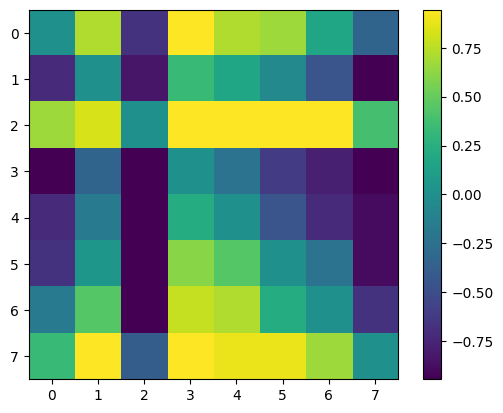

In [11]:
plt.imshow(team_matrix)
plt.colorbar()

In [18]:
g_team_id = 8
opp_team_id = 3
cat_wins = {}
min_weeks = 10
weeks = 18
for week in range(min_weeks,weeks):
    team_scores = retrieve_espn_matchup(swid,espn_s2,league_id,week=week)
    g_team = team_scores[g_team_id]
    opp_team = team_scores[opp_team_id]
    for cat in g_team:
        if cat not in cat_wins:
            cat_wins[cat] = np.array([0,0,0])
        if g_team[cat]>opp_team[cat]:
            cat_wins[cat]+=np.array([1,0,0])
        elif g_team[cat]<opp_team[cat]:
            cat_wins[cat]+=np.array([0,1,0])
        else:
            cat_wins[cat]+=np.array([0,0,1])

cat_wins    

{'blocks': array([4, 4, 0]),
 'power play points': array([6, 2, 0]),
 'goals': array([5, 3, 0]),
 'assists': array([6, 1, 1]),
 'plus_minus': array([2, 6, 0]),
 'penalty_minutes': array([3, 3, 2]),
 'FOW': array([2, 6, 0]),
 'average_time_on_ice': array([2, 6, 0]),
 'shots_on_goal': array([6, 2, 0]),
 'hits': array([3, 5, 0])}

In [ ]:
url = f"https://lm-api-reads.fantasy.espn.com/apis/v3/games/fhl/seasons/2025/segments/0/leagues/{league_id}?view=mMatchup"

r = requests.get(url,
                    cookies={"SWID": swid, "espn_s2": espn_s2})

d = r.json()

In [19]:
min_weeks = 1
weeks = 18
scores = {}
for g_team_id in range(1,9):
    cat_wins = {}
    for week in range(min_weeks,weeks):
        team_scores = {}
        for matchup in d['schedule'][4*(week-1):4*week]:
            teams = [matchup['home'],matchup['away']]
            for team in teams:
                team_score_dict = {}
                team_score = team['cumulativeScore']['scoreByStat']
                for score_cat in team_score:
                    # if team_score[score_cat]['ineligible']==False:
                    if score_cat in scoring_cats:
                        if team_score[score_cat]['ineligible']==True:
                            team_score_dict[scoring_cats[score_cat]]=-0
                        else:
                            team_score_dict[scoring_cats[score_cat]]=team_score[score_cat]['score']
                team_scores[team['teamId']] = team_score_dict
        g_team = team_scores[g_team_id]
        
        for opp_team_id in range(1,9):
            opp_team = team_scores[opp_team_id]
            for cat in g_team:
                if cat not in cat_wins:
                    cat_wins[cat] = np.array([0,0,0])
                if g_team[cat]>opp_team[cat]:
                    cat_wins[cat]+=np.array([1,0,0])
                elif g_team[cat]<opp_team[cat]:
                    cat_wins[cat]+=np.array([0,1,0])
                else:
                    cat_wins[cat]+=np.array([0,0,1])
    print()
    print(g_team_id)
    print()
    max_val = np.max([cat_wins[cat][0] for cat in cat_wins])
    min_val = np.min([cat_wins[cat][0] for cat in cat_wins])
    for cat in cat_wins:
        # 
        if cat_wins[cat][0]==max_val:
            print(cat,int(np.round(cat_wins[cat][0]/np.sum(cat_wins[cat])*100,0)),int(np.round(cat_wins[cat][2]/np.sum(cat_wins[cat])*100)),'MAX')
        
        elif cat_wins[cat][0]==min_val:
            print(cat,int(np.round(cat_wins[cat][0]/np.sum(cat_wins[cat])*100,0)),int(np.round(cat_wins[cat][2]/np.sum(cat_wins[cat])*100)),'MIN')
        else:
            print(cat,int(np.round(cat_wins[cat][0]/np.sum(cat_wins[cat])*100,0)),int(np.round(cat_wins[cat][2]/np.sum(cat_wins[cat])*100)))
    scores[g_team_id] = np.sum([3*cat_wins[cat][0]/np.sum(cat_wins[cat]) + cat_wins[cat][2]/np.sum(cat_wins[cat]) for cat in cat_wins])
          


1

Goalie Games Started 56 28
Blocks 60 16
Goalie Wins 57 29
PLAYERS 57 18
PPP 32 15 MIN
Save Percentage 44 12
Goals 49 18
Assists 32 21
+/- 47 13
PIM 43 14
FOW 72 12 MAX
ATOI 66 12
SOG 42 12
Hits 68 13

2

Goalie Games Started 21 29
Blocks 35 15
Goalie Wins 40 35
PLAYERS 15 12
PPP 35 17
Save Percentage 47 13
Goals 32 23
Assists 31 15
+/- 38 16
PIM 21 15
FOW 12 15 MIN
ATOI 55 12 MAX
SOG 38 12
Hits 18 14

3

Goalie Games Started 49 27
Blocks 68 17
Goalie Wins 33 33 MIN
PLAYERS 62 18
PPP 58 18
Save Percentage 57 12
Goals 57 19
Assists 59 18
+/- 48 14
PIM 62 15
FOW 76 13 MAX
ATOI 75 12
SOG 75 12
Hits 58 13

4

Goalie Games Started 14 31 MIN
Blocks 28 15
Goalie Wins 18 33
PLAYERS 26 15
PPP 25 19
Save Percentage 29 14
Goals 20 22
Assists 26 14
+/- 38 14 MAX
PIM 35 14
FOW 19 14
ATOI 18 12
SOG 19 13
Hits 24 12

5

Goalie Games Started 33 33
Blocks 29 16
Goalie Wins 20 36
PLAYERS 34 16
PPP 17 16
Save Percentage 36 12
Goals 18 17
Assists 22 18
+/- 43 14
PIM 58 13
FOW 19 14
ATOI 1 12 MIN
SOG 13

In [20]:
sorted(scores.items(),key=lambda x:x[1],reverse=True)

[(3, 27.536764705882355),
 (8, 25.757352941176467),
 (1, 24.066176470588236),
 (7, 20.727941176470587),
 (6, 16.86764705882353),
 (2, 15.595588235294116),
 (5, 15.051470588235293),
 (4, 12.595588235294116)]

1
Goals 157.0
Assists 225.0
+/- 36.0
PIM 259.0
FOW 1488.0
ATOI 9722.800252910001
SOG 1246.0
Hits 668.0
Blocks 572.0
PPP 89.0
Goalie Games Started 52.0
Goalie Wins 31.0
Save Percentage 7.30440905
PLAYERS 554.0

3
Goals 148.0
Assists 254.0
+/- 47.0
PIM 279.0
FOW 1600.0
ATOI 9875.812231259999
SOG 1363.0
Hits 586.0
Blocks 524.0
PPP 119.0
Goalie Games Started 43.0
Goalie Wins 20.0
Save Percentage 7.393752579999999
PLAYERS 548.0

7
Goals 137.0
Assists 223.0
+/- 13.0
PIM 269.0
FOW 1173.0
ATOI 9413.4880156
SOG 1235.0
Hits 553.0
Blocks 519.0
PPP 100.0
Goalie Games Started 34.0
Goalie Wins 19.0
Save Percentage 5.467126
PLAYERS 549.0

8
Goals 181.0
Assists 290.0
+/- -14.0
PIM 253.0
FOW 1340.0
ATOI 9722.186804609999
SOG 1448.0
Hits 540.0
Blocks 494.0
PPP 144.0
Goalie Games Started 45.0
Goalie Wins 21.0
Save Percentage 7.20724959
PLAYERS 573.0



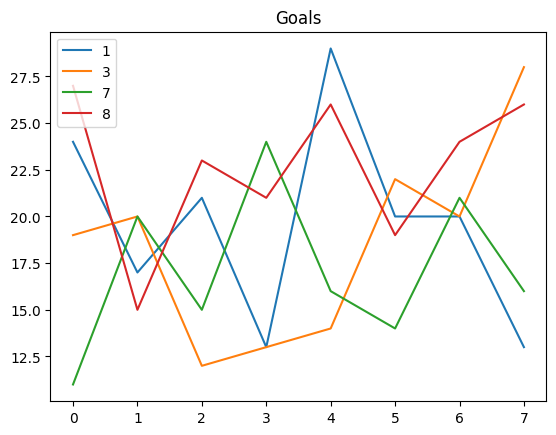

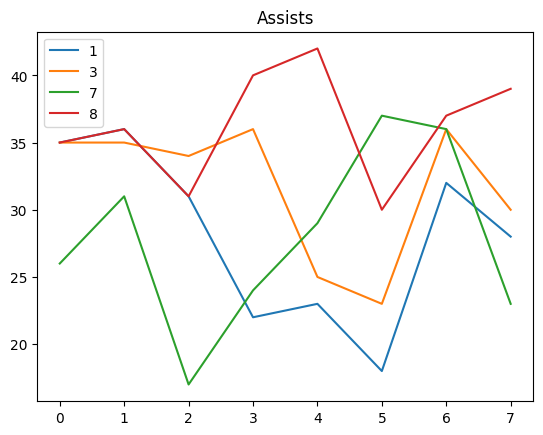

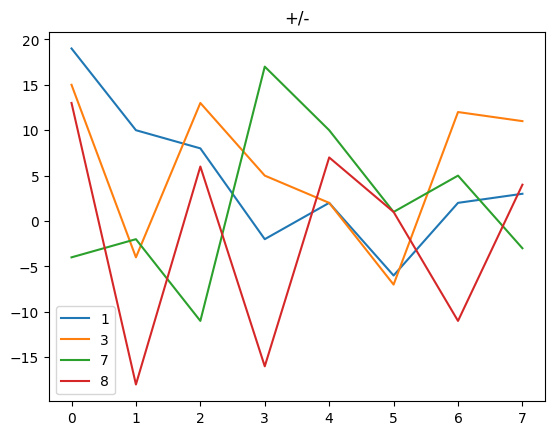

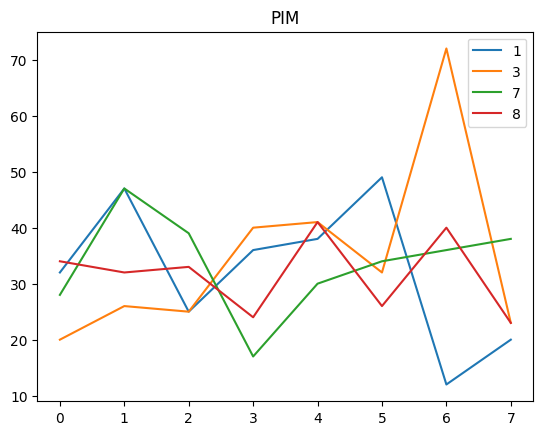

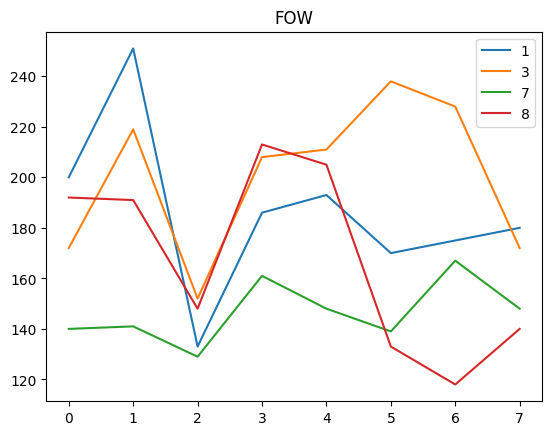

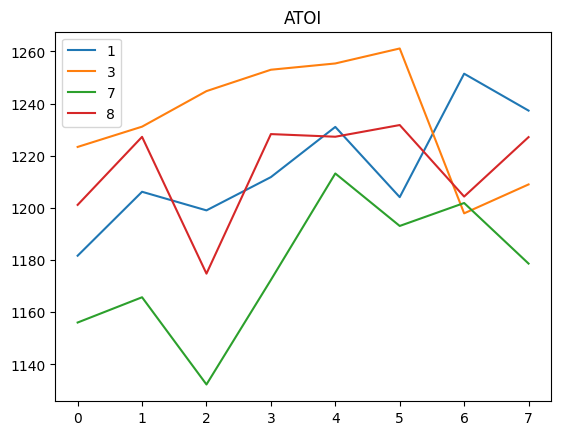

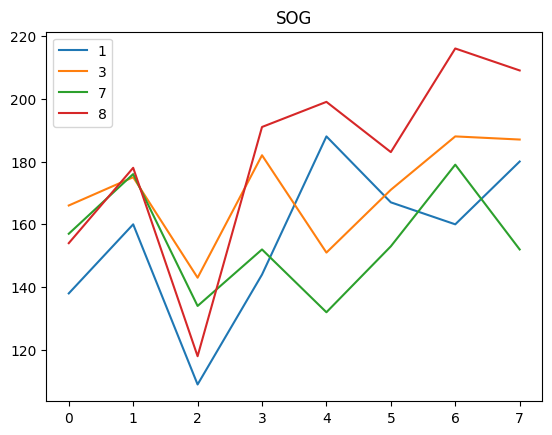

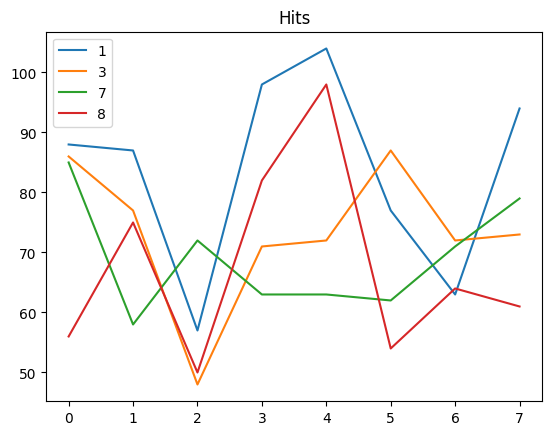

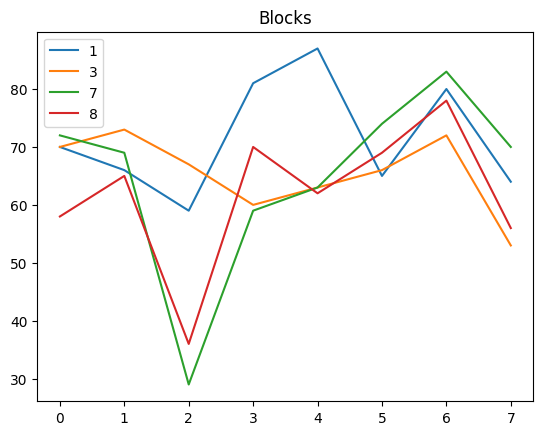

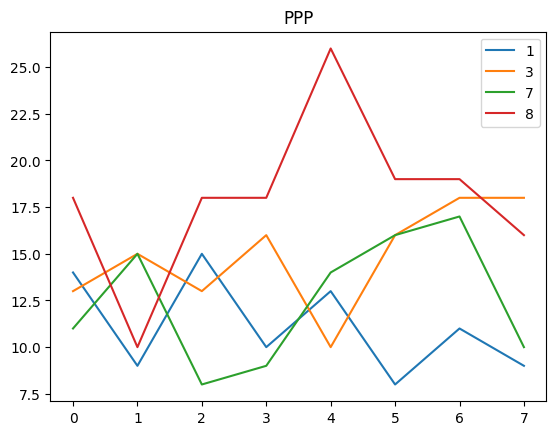

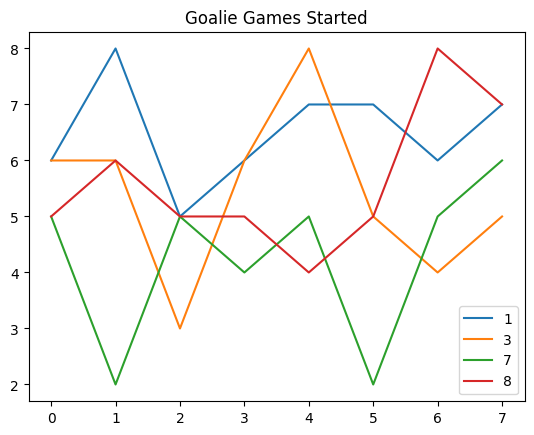

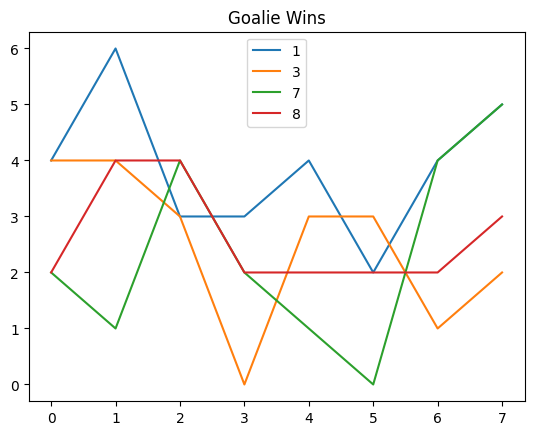

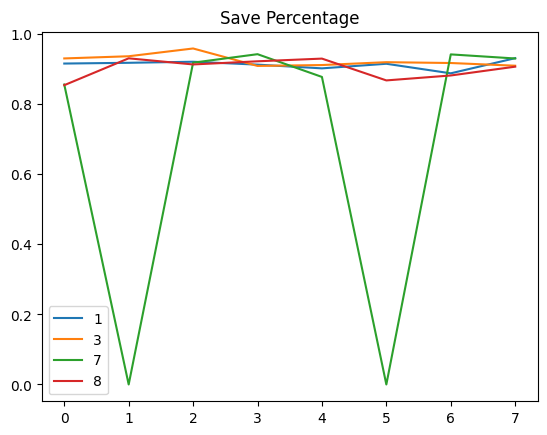

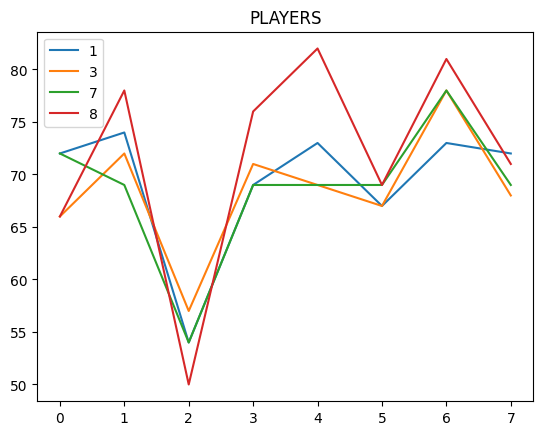

In [21]:
min_weeks = 10
weeks = 18
scores = {}
g_team_id = 8
opp_team_id = 7

team_ids = [1,3,7,8]
for team_id in team_ids:
    cat_totals = {}
    for week in range(min_weeks,weeks):
        team_scores = {}
        for matchup in d['schedule'][4*(week-1):4*week]:
            teams = [matchup['home'],matchup['away']]
            for team in teams:
                team_score_dict = {}
                team_score = team['cumulativeScore']['scoreByStat']
                for score_cat in scoring_cats:
                    # if team_score[score_cat]['ineligible']==False:
                    if score_cat in scoring_cats:
                        if team_score[score_cat]['ineligible']==True:
                            team_score_dict[scoring_cats[score_cat]]=-0
                        else:
                            team_score_dict[scoring_cats[score_cat]]=team_score[score_cat]['score']
                team_scores[team['teamId']] = team_score_dict
        g_team = team_scores[team_id]
        for cat in g_team:
            if cat in cat_totals:
                cat_totals[cat].append(g_team[cat])
            else:
                cat_totals[cat]=[g_team[cat]]
    print(team_id)
    for fig_id,cat in enumerate(cat_totals.keys()):
        plt.figure(fig_id)
        plt.plot(cat_totals[cat],label=team_id)
        plt.legend()
        plt.title(cat)
        print(cat,np.sum(cat_totals[cat]))
    print()
plt.show()
          

In [22]:
scoring_cats = {
    '13':'Goals',
    '14':'Assists',
    '15':'+/-',
    '17':'PIM',
    '23':'FOW',
    '27':'ATOI',
    '29':'SOG',
    '31':'Hits',
    '32':'Blocks',
    '38':'PPP',
    '0':'Goalie Games Started',
    '1':'Goalie Wins',
    '11':'Save Percentage',
    '34':"PLAYERS",
}


In [23]:
best_scores = {p:{k:(0,None) for k in scoring_cats.values()} for p in range(1,9)}
min_weeks = 1
weeks = 18
for g_team_id in range(1,9):
    cat_wins = {}
    for week in range(min_weeks,weeks):
        team_scores = {}
        for matchup in d['schedule'][4*(week-1):4*week]:
            teams = [matchup['home'],matchup['away']]
            for team in teams:
                team_score_dict = {}
                team_score = team['cumulativeScore']['scoreByStat']
                for score_cat in team_score:
                    # if team_score[score_cat]['ineligible']==False:
                    if score_cat in scoring_cats:
                        if team_score[score_cat]['ineligible']==True:
                            team_score_dict[scoring_cats[score_cat]]=-0
                        else:
                            team_score_dict[scoring_cats[score_cat]]=team_score[score_cat]['score']
                team_scores[team['teamId']] = team_score_dict
        for opp_team_id in range(1,9):
            opp_team = team_scores[opp_team_id]
            for cat in scoring_cats.values():
                # if opp_team[cat]/opp_team['PLAYERS'] >= best_scores[cat][0]:
                #     best_scores[cat]=(opp_team[cat]/opp_team['PLAYERS'],opp_team_id,week)
                if opp_team[cat] > best_scores[opp_team_id][cat][0]:
                    best_scores[opp_team_id][cat]=(opp_team[cat],week)

In [24]:
best_scores

{1: {'Goals': (29.0, 14),
  'Assists': (36.0, 11),
  '+/-': (20.0, 9),
  'PIM': (49.0, 15),
  'FOW': (251.0, 11),
  'ATOI': (1255.4375, 2),
  'SOG': (188.0, 14),
  'Hits': (104.0, 6),
  'Blocks': (87.0, 14),
  'PPP': (18.0, 1),
  'Goalie Games Started': (8.0, 11),
  'Goalie Wins': (6.0, 11),
  'Save Percentage': (0.93193717, 1),
  'PLAYERS': (76.0, 8)},
 2: {'Goals': (27.0, 10),
  'Assists': (35.0, 17),
  '+/-': (19.0, 17),
  'PIM': (36.0, 17),
  'FOW': (155.0, 4),
  'ATOI': (1253.58823529, 2),
  'SOG': (186.0, 16),
  'Hits': (91.0, 15),
  'Blocks': (78.0, 14),
  'PPP': (20.0, 14),
  'Goalie Games Started': (7.0, 16),
  'Goalie Wins': (4.0, 1),
  'Save Percentage': (0.96666667, 5),
  'PLAYERS': (70.0, 16)},
 3: {'Goals': (30.0, 6),
  'Assists': (45.0, 2),
  '+/-': (15.0, 5),
  'PIM': (72.0, 16),
  'FOW': (249.0, 6),
  'ATOI': (1296.71212121, 5),
  'SOG': (225.0, 8),
  'Hits': (99.0, 8),
  'Blocks': (97.0, 4),
  'PPP': (22.0, 2),
  'Goalie Games Started': (8.0, 4),
  'Goalie Wins': (4.0